# Inferential Statistics 

The goal of this notebook is to apply some inferential statistics to the endangered langauges dataset to find the variables that can help me answer the questions I'm posing. Along with finding out if there is any strong correlation between the data. And with finding the best tests to analyze the data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

sns.set()
sns.set(font_scale=1.6)

endangered_languages = pd.read_csv('../data_sets/endangered_languages_ML.csv', index_col=0)

In [36]:
endangered_languages.head()

,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $),The former Yugoslav Republic of Macedonia,Ethiopia,Costa Rica,Sudan,...,Venezuela (Bolivarian Republic of),Sri Lanka,Argentina,Uzbekistan,Senegal,Critically endangered,Definitely endangered,Extinct,Severely endangered,Vulnerable
Language,,,,,,,,,,,,,,,,,,,,,
South Italian,7500000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Sicilian,5000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Lombard,3500000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Emilian-Romagnol,2000000.0,1.714074,35.0,55.77,2,944337429320,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Piedmontese,2000000.0,1.714074,35.0,55.77,1,944337429320,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
columns_to_keep = ['Speakers', 'Fertility Rate Avg', '2018 Rank', '2018 Score', 'Number of Countries Spoken',
                  'GDP Average (Current US $)']
endangered_languages_scaled_down = endangered_languages[columns_to_keep]

endangered_languages_to_matrix = endangered_languages_scaled_down.corr()
endangered_languages_to_matrix.head()

,Speakers,Fertility Rate Avg,2018 Rank,2018 Score,Number of Countries Spoken,GDP Average (Current US $)
Speakers,1.000000,-0.068409,-0.009407,-0.057125,0.358657,-0.049950
Fertility Rate Avg,-0.068409,1.000000,0.621772,-0.599657,-0.029270,-0.466073
2018 Rank,-0.009407,0.621772,1.000000,-0.905096,0.031570,-0.567789
2018 Score,-0.057125,-0.599657,-0.905096,1.000000,-0.051781,0.658498
Number of Countries Spoken,0.358657,-0.029270,0.031570,-0.051781,1.000000,-0.049782


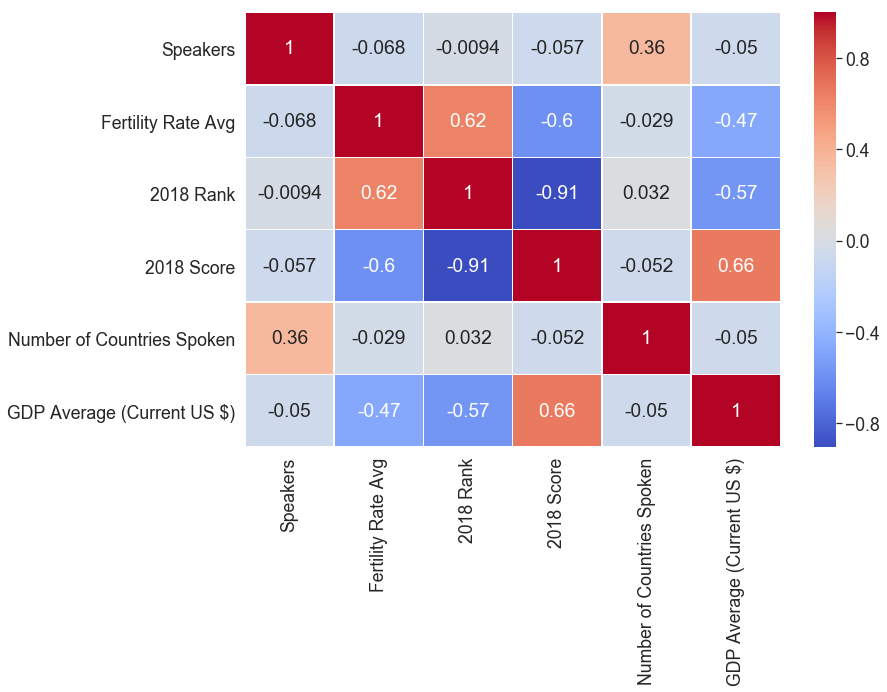

In [38]:
# This will find the pearson correlation coeficient
_ = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(endangered_languages_to_matrix, linewidths=0.5, annot=True, cmap='coolwarm')
_fig = _.get_figure()
_fig.savefig('../images/initial_heatmap_endangered.png', bbox_inches='tight')
plt.show()

In [39]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [40]:
x_speakers, y_speakers = ecdf(endangered_languages['Speakers'])

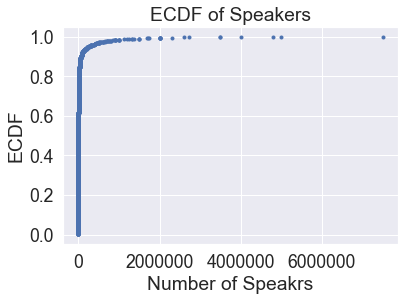

In [41]:
_ = plt.plot(x_speakers, y_speakers, marker='.', linestyle='none')
_ = plt.xlabel('Number of Speakrs')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Speakers')
plt.show()

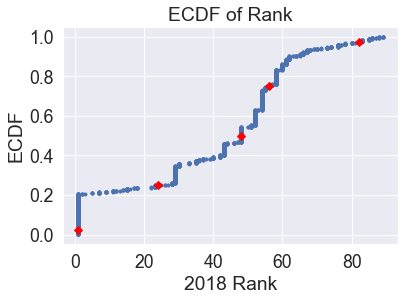

In [42]:
x_rank, y_rank = ecdf(endangered_languages['2018 Rank'])
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_rank = np.percentile(endangered_languages['2018 Rank'], percentiles)
_ = plt.plot(x_rank, y_rank, marker='.', linestyle='none')
_ = plt.xlabel('2018 Rank')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Rank')
_ = plt.plot(ptiles_rank, percentiles/100, marker='D', color='red', linestyle='none')
plt.show()

In [43]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]

In [44]:
r = pearson_r(endangered_languages['Speakers'], endangered_languages['2018 Rank'])

In [45]:
r

-0.00940721126007604

In [46]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [47]:
speakers_no_outliers = reject_outliers(endangered_languages['Speakers'])

In [48]:
# x_speakers_no_outliers, y_speakers_no_outliers = ecdf(speakers_no_outliers)
# _ = plt.plot(x_speakers_no_outliers, y_speakers_no_outliers, marker='.', linestyle='none')
# _ = plt.xlabel('Number of Speakrs')
# _ = plt.ylabel('ECDF')
# _ = plt.title('ECDF of Speakers w/o Outliers')
# plt.show()

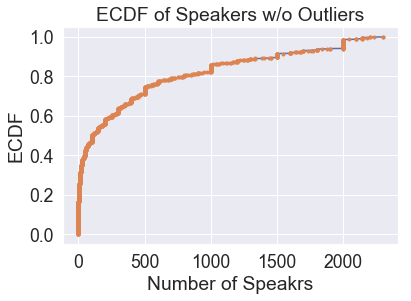

In [49]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(speakers_no_outliers)
sigma = np.std(speakers_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.choice(speakers_no_outliers, 10000, replace=True)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(speakers_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Number of Speakrs')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Speakers w/o Outliers')
plt.show()

In [50]:
# Focus on regression tests, chi squared, adjusted r squared

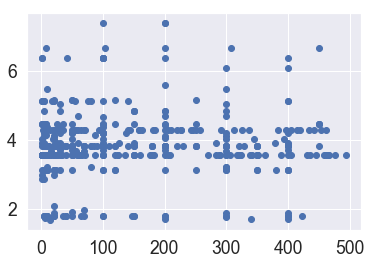

In [51]:
lower_speakers = endangered_languages[endangered_languages['Speakers'] < 500]
no_eng = lower_speakers[lower_speakers['2018 Rank'] != 1.0]
no_zeros = no_eng[no_eng['Speakers'] != 0]
# no_eng.head()
_ = plt.scatter(no_zeros['Speakers'], 
                no_zeros['Fertility Rate Avg'], data=no_zeros)
plt.show()

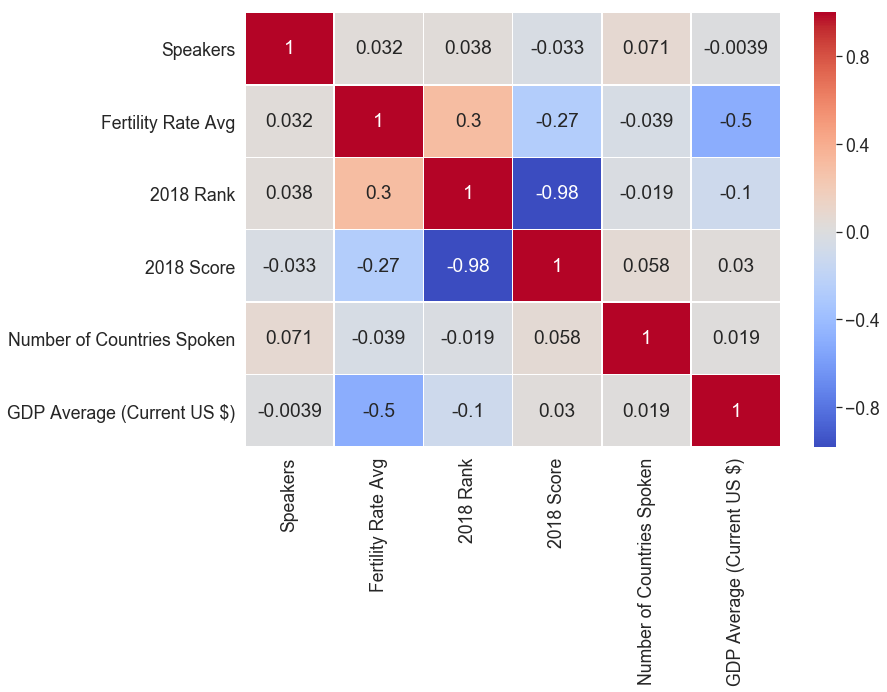

In [52]:
no_zeros_w_columns = no_zeros[columns_to_keep]

_ = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(no_zeros_w_columns.corr(), linewidths=0.5, annot=True, cmap='coolwarm')
plt.show()

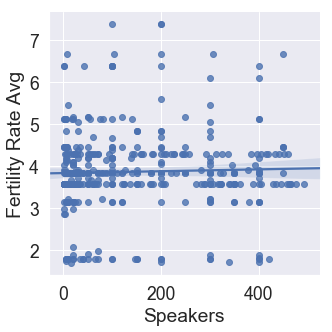

In [53]:
sns.lmplot(x='Speakers', y='Fertility Rate Avg', data=no_zeros)

In [54]:
endangered_languages_non_ML = pd.read_csv('../data_sets/endangered_languages_final.csv', index_col=0)
endangered_languages_non_ML.head()

,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band,Number of Countries Spoken,GDP Average (Current US $)
Language,,,,,,,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11
Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739,1.714074,35.0,55.77,Moderate Proficiency,2,9.443374e+11
Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662,1.714074,35.0,55.77,Moderate Proficiency,1,9.443374e+11


In [55]:
pivot = pd.pivot_table(endangered_languages_non_ML, index='Degree of Endangerment', values='Speakers', aggfunc='count')

In [56]:
pivot

,Speakers
Degree of Endangerment,
Critically endangered,541
Definitely endangered,628
Extinct,241
Severely endangered,496
Vulnerable,608


In [57]:
speakers_fertility = endangered_languages_non_ML[['Degree of Endangerment', 'Fertility Rate Avg']]

In [58]:
speakers_fertility.head()

,Degree of Endangerment,Fertility Rate Avg
Language,,
South Italian,Vulnerable,1.714074
Sicilian,Vulnerable,1.714074
Lombard,Definitely endangered,1.714074
Emilian-Romagnol,Definitely endangered,1.714074
Piedmontese,Definitely endangered,1.714074


In [59]:
speakers_fertility['Degree of Endangerment'].value_counts()

Definitely endangered    673
Vulnerable               625
Critically endangered    604
Severely endangered      545
Extinct                  250
Name: Degree of Endangerment, dtype: int64

In [60]:
contingency_table = pd.crosstab(
    speakers_fertility['Degree of Endangerment'],
    speakers_fertility['Fertility Rate Avg'],
    margins = True
)
contingency_table

Fertility Rate Avg,1.6011111111111107,1.6760000000000004,1.701296296296296,1.7114814814814816,1.7140740740740743,1.7248148148148146,1.7429074074074076,1.7605555555555554,1.7687037037037034,1.7751851851851854,...,6.574092592592592,6.636,6.6766296296296295,6.895944444444442,6.905962962962962,6.91698148148148,7.3051666666666675,7.382833333333334,7.585222222222222,All
Degree of Endangerment,,,,,,,,,,,,,,,,,,,,,
Critically endangered,0,1,1,0,0,0,1,0,1,3,...,0,0,6,8,1,0,0,2,0,604
Definitely endangered,3,5,0,0,16,1,1,1,0,0,...,0,1,8,7,0,2,1,5,0,673
Extinct,1,0,1,1,0,0,2,0,0,0,...,2,0,4,2,3,0,0,0,0,250
Severely endangered,2,2,0,0,5,0,4,0,0,3,...,2,0,3,10,1,0,1,4,1,545
Vulnerable,7,0,1,1,2,0,0,0,0,0,...,0,0,8,1,1,0,0,1,1,625
All,13,8,3,2,23,1,8,1,1,6,...,4,1,29,28,6,2,2,12,2,2697


In [61]:
crit_counts = contingency_table.loc['Critically endangered'][:-1].values
def_counts = contingency_table.loc['Definitely endangered'][:-1].values
sev_counts = contingency_table.loc['Severely endangered'][:-1].values
vul_counts = contingency_table.loc['Vulnerable'][:-1].values
ex_counts = contingency_table.loc['Extinct'][:-1].values

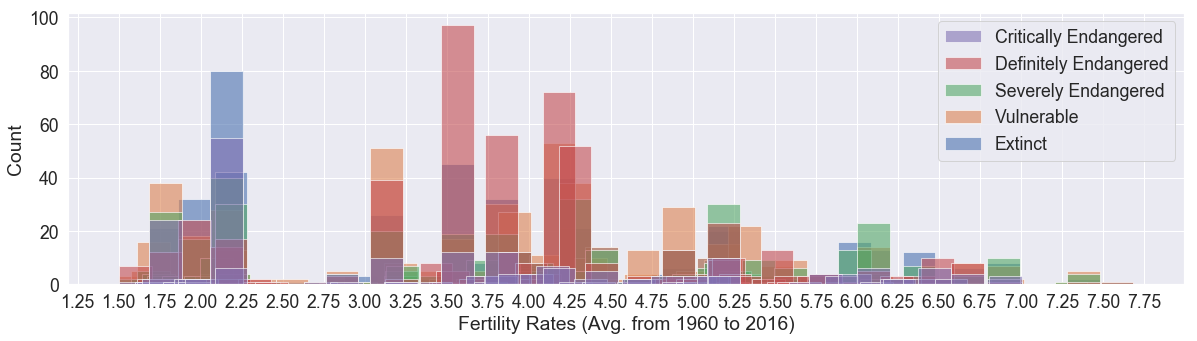

In [78]:
import matplotlib.ticker as ticker
tick_spacing = 0.25

fig = plt.figure(figsize=(20, 5))
categories = contingency_table.columns[:-1]
p1 = plt.bar(categories, crit_counts, 0.2, alpha=0.6)
p2 = plt.bar(categories, def_counts, 0.2, alpha=0.6)
p3 = plt.bar(categories, sev_counts, 0.2, alpha=0.6)
p4 = plt.bar(categories, vul_counts, 0.2, alpha=0.6)
p5 = plt.bar(categories, ex_counts, 0.2, alpha=0.6)
plt.legend((p5[0], p4[0], p3[0], p2[0], p1[0]), ('Critically Endangered', 'Definitely Endangered', 
                                                 'Severely Endangered', 'Vulnerable', 'Extinct'))
# setting axes
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Fertility Rates (Avg. from 1960 to 2016)')
plt.ylabel('Count')
plt.show()

In order to determine whether we accept or reject the null hypothesis. We have to compute p-value similar to the welch's t-test and ANOVA. For testing with two categorical variables, we will use the Chi-squared test.

X2=(observed−expected)2/(expected)

Where X2 is the test statistic, observecd are values we have in the contingency table, expected are values we would expect assuming the null hypothesis is true. Theoretically speaking, if all the expected values are equal to the observed values, then the X2 statistic will be 0. As a result, the null hypothesis will be retained.

### The Chi-Squared Test for Independence - Using Scipy
Now that we've gone through all the calculations, it is time to look for shortcuts. Scipy has a function that plugs in all the values for us.

All we need to do is format the observed values into a two-dimensional array and plug it into the function.

In [63]:
f_obs = np.array([crit_counts, def_counts, sev_counts, vul_counts, ex_counts])
# f_obs

In [64]:
chi2_contingency(f_obs)[0:3]

(1315.3141669148054, 3.0216147625258117e-71, 516)

The results were exactly the same as our calculations with Numpy. The X2 = ~1315, p-value = ~0 and degrees of freedom = 516.

#### Conclusions
With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'Degree of endangerment' and the 'Fertility Rate Avg' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other

In [65]:
endangered_languages_non_ML.dropna(inplace=True)
speakers_rank = endangered_languages_non_ML[['Degree of Endangerment', '2018 Rank']]
# speakers_rank

In [66]:
contingency_table2 = pd.crosstab(
    speakers_rank['Degree of Endangerment'],
    speakers_rank['2018 Rank'],
    margins = True
)
contingency_table2

2018 Rank,1.0,2.0,3.0,5.0,7.0,9.0,11.0,12.0,13.0,14.0,...,80.0,81.0,82.0,83.0,85.0,86.0,87.0,88.0,89.0,All
Degree of Endangerment,,,,,,,,,,,,,,,,,,,,,
Critically endangered,134,1,0,1,3,0,0,0,0,0,...,1,0,3,1,2,4,0,0,1,424
Definitely endangered,54,2,0,0,0,3,1,1,1,0,...,2,1,0,6,5,1,1,1,1,467
Extinct,62,0,0,0,7,1,1,0,0,1,...,0,0,0,4,0,0,0,3,0,192
Severely endangered,88,0,0,2,0,2,2,1,0,2,...,4,0,3,4,4,2,1,0,2,349
Vulnerable,58,0,1,0,0,0,3,1,0,0,...,0,0,4,2,0,1,0,1,1,499
All,396,3,1,3,10,6,7,3,1,3,...,7,1,10,17,11,8,2,5,5,1931


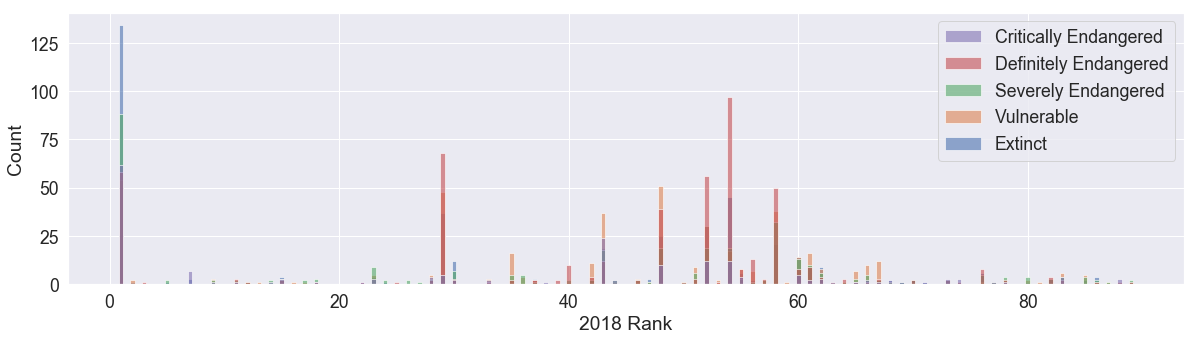

In [67]:
crit_counts2 = contingency_table2.loc['Critically endangered'][:-1].values
def_counts2 = contingency_table2.loc['Definitely endangered'][:-1].values
sev_counts2 = contingency_table2.loc['Severely endangered'][:-1].values
vul_counts2 = contingency_table2.loc['Vulnerable'][:-1].values
ex_counts2 = contingency_table2.loc['Extinct'][:-1].values

# tick_spacing = 0.25

fig = plt.figure(figsize=(20, 5))

categories = contingency_table2.columns[:-1]
p1 = plt.bar(categories, crit_counts2, 0.4, alpha=0.6)
p2 = plt.bar(categories, def_counts2, 0.4, alpha=0.6)
p3 = plt.bar(categories, sev_counts2, 0.4, alpha=0.6)
p4 = plt.bar(categories, vul_counts2, 0.4, alpha=0.6)
p5 = plt.bar(categories, ex_counts2, 0.4, alpha=0.6)
plt.legend((p5[0], p4[0], p3[0], p2[0], p1[0]), ('Critically Endangered', 'Definitely Endangered', 
                                                 'Severely Endangered', 'Vulnerable', 'Extinct'))
# setting axes
# ax = plt.axes()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('2018 Rank')
plt.ylabel('Count')
plt.show()